# HW1 -Q1

###### Team member:
- Brian Allen (ba2542)
- Haozheng Ni (hn2318)
- Serena Zhang (mz2642)

## Set up

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import time

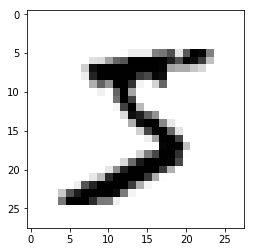

In [2]:
ocr = loadmat('ocr.mat')
plt.imshow(ocr['data'][0].reshape((28,28)), cmap=cm.gray_r)
plt.show()

## Calculate Nearest Neighbor

In [3]:
def sampling(steps):
    nums=[]
    for n in steps:
        sel=random.sample(range(60000),n)
        trainx=ocr["data"][sel].astype("float")
        trainy=ocr["labels"][sel]
        testx=ocr["testdata"]
        result=np.array([])
        j=np.array([np.einsum('ij,ji->i', testx,testx.T)])
        i=np.array([np.einsum('ij,ji->i', trainx,trainx.T)]).T
        k=np.dot(trainx,testx.T)
        squared=i+j
        squared=squared-2*k
        yindex=np.argmin(squared, axis=0)
        result=np.append(result,trainy[yindex])
        predicted=trainy[yindex]
        actual=ocr["testlabels"]
        nums.append((np.sum(predicted!=actual))/ocr["testlabels"].shape[0])
    return nums

In [6]:
alllist=[]
steps=[1000,2000,4000,8000]
start_time = time.time()
for i in range(10):
    temp=np.asarray(sampling(steps))
    alllist.append(temp)
final=[sum(e)/len(e) for e in zip(*alllist)]
print("The model ran for %s seconds ---" % (time.time() - start_time))

The model ran for 63.30587124824524 seconds ---


## Plot Error Rate

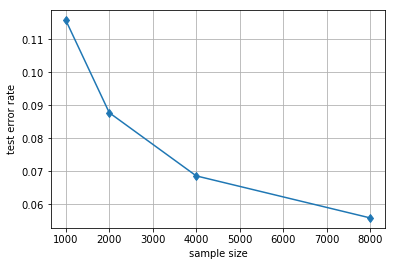

In [5]:
import matplotlib.pyplot as plt

plt.plot(steps,final,"-d")
plt.grid()
plt.xlabel("sample size")
plt.ylabel("test error rate")
plt.show()